In [1]:
import pandas as pd
from scipy import io
import numpy as np

In [2]:
arff_file = io.arff.loadarff('phpMawTba.arff')

In [3]:
adult_census = pd.DataFrame(arff_file[0])

# convert bytes columns to strings

str_df = adult_census.select_dtypes([object])
str_df = str_df.stack().str.decode('utf-8').unstack()

for col in str_df:
    adult_census[col] = str_df[col]

In [4]:
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns = target_name)

In [5]:
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

In [6]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state = 42
)

In [7]:
#statistics about training data
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [8]:
#scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [9]:
scaler.mean_

array([  38.64235211, 1087.07772106,   89.6653108 ,   40.43124676])

In [10]:
scaler.scale_

array([  13.72556083, 7522.59025606,  407.10461772,   12.42378265])

In [11]:
#data transformation

data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [12]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [13]:
#output pandas dataframe instead of numpy arrays
scaler = StandardScaler().set_output(transform = "pandas")
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-2.273364e-16,3.530310e-17,3.840667e-17,1.844684e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,1.314865e+01,1.047970e+01,4.714245e+00


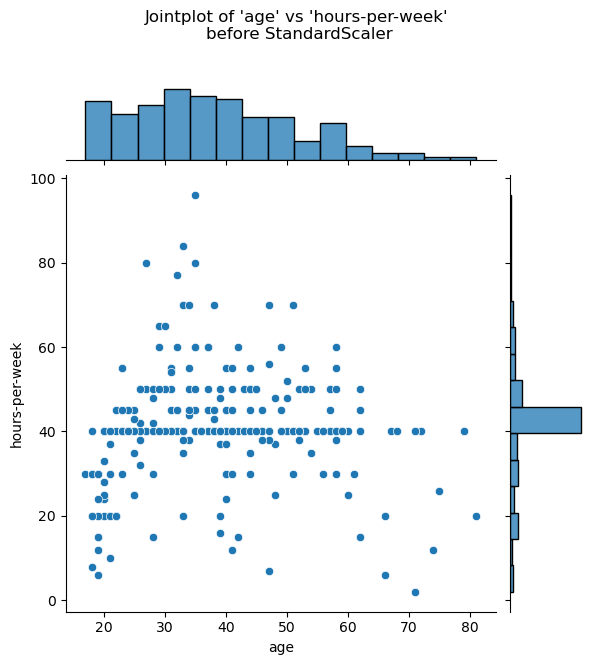

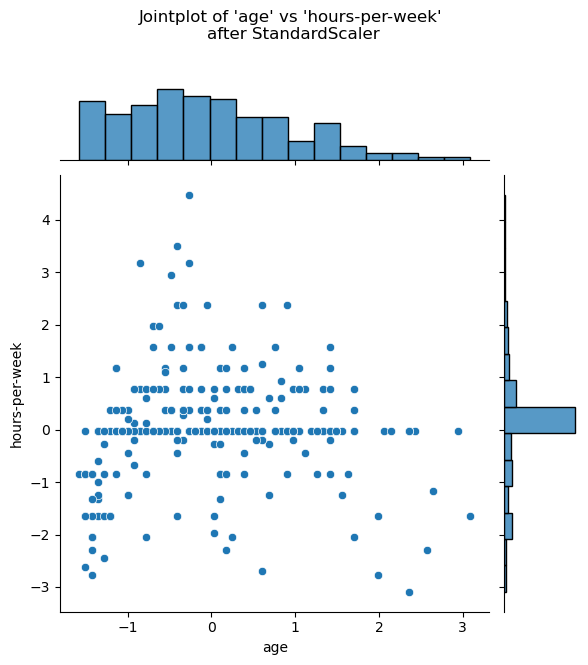

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#number of points to visualize to have a clearer plot
num_points_to_plot = 300

sns.jointplot(
    data = data_train[:num_points_to_plot],
    x = "age",
    y = "hours-per-week",
    marginal_kws = dict(bins = 15),
)
plt.suptitle(
    "Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y = 1.1
)
sns.jointplot(
    data = data_train_scaled[:num_points_to_plot],
    x = "age",
    y = "hours-per-week",
    marginal_kws = dict(bins = 15),
)
_ = plt.suptitle(
    "Jointplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y = 1.1
)

In [16]:
#Pipeline chains together operations and is used as any other classifer or regressor
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [17]:
#check steps of out model
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [18]:
#can use same methods with predictive pipeline
start = time.time()
model.fit(data_train, target_train)
elasped_time = time.time() - start

In [19]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array(['<=50K', '<=50K', '>50K', '<=50K', '<=50K'], dtype=object)

In [21]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elasped_time:.3f} seconds "
    f"in {model[-1].n_iter_[0]} iterations."
)

The accuracy using a Pipeline is 0.807 with a fitting time of 0.085 seconds in 9 iterations.


In [22]:
#compare this predictive model with one that did not scale features

model = LogisticRegression()
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [23]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time:.3f} seconds "
    f"in {model.n_iter_[0]} iterations."
)

The accuracy using a LogisticRegression is 0.807 with a fitting time of 0.131 seconds in 60 iterations.
